In [2]:
import sys
sys.path.append("../../")

In [3]:
from delay.delay import *
import delay.calculator as calc
from delay.strategy import fA_HardInterval, fB_HardInterval, showIntervalFunctions
from delay.simulation import Simulation, FunctionType
from delay.regression import linearRegression, Dependence, whereSmallerOrEqual
from delay.value import calculateValue
import pandas as pd

In [10]:
N = 12
simulation = Simulation(FunctionType.HARD_INTERVAL, (3, 0), calculateValue, calc.linear(N=N, w=1))
simulation.setN(N)
simulation.setConv(0)
simulation.setDuration(1000000) # 10^6
simulation.setD(3)

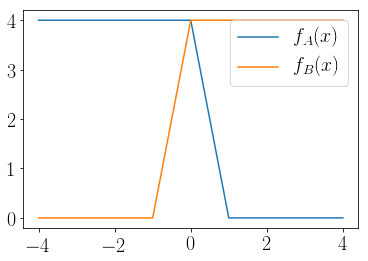

In [7]:
showIntervalFunctions(fA_HardInterval, fB_HardInterval, N, d=0)

[0, 1, 2, 3, 2, 1, 2, 3, 4, 3, 2, 3, 2, 3, 2, 1, 0, 1, 0, 1, 0, -1, 0, 1, 2, 3, 4, 5, 4, 3, 2, 1, 0, -1, 0, -1, 0, -1, -2, -1, 0, -1, 0, 1, 0, 1, 2, 1, 0, -1, -2, -1, -2, -3, -4, -3, -4, -3, -2, -3, -2, -3, -4, -3, -4, -3, -4, -3, -2, -1, 0, 1, 0, -1, -2, -1, -2, -3, -2, -1, 0, -1, 0, -1, -2, -3, -2, -3, -2, -1, 0, -1, 0, 1, 0, -1, -2, -3, -2, -3]


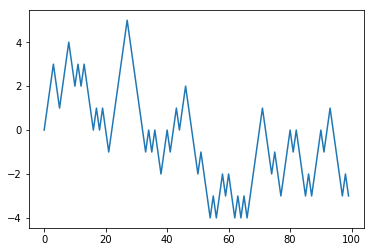

In [11]:
simulation.run()
seq = simulation.x[2:]
print(seq[:100])
plt.plot(seq[:100]);

In [6]:
def find(seq, pattern):
    res = 0
    for i in range(len(seq) - len(pattern) - 1):
        match = True
        for j in range(len(pattern)):
            if seq[i+j] != pattern[j]:
                match = False
        if match:
            res += 1
    return res

In [12]:
for i in [-1, 1]:
    for j in [-1, 1]:
        for k in [-1, 1]:
            a = find(seq, [3 + i + j + k, 3 + i + j, 3 + i, 3])
            print('(%d, %d, %d, 3): %d' % (3 + i + j + k, 3 + i + j, 3 + i, a))

(0, 1, 2, 3): 17702
(2, 1, 2, 3): 9830
(2, 3, 2, 3): 11538
(4, 3, 2, 3): 3711
(2, 3, 4, 3): 9764
(4, 3, 4, 3): 2355
(4, 5, 4, 3): 7405
(6, 5, 4, 3): 4904


In [18]:
from fractions import Fraction

a = find(seq, [3, 2])
b = find(seq, [3, 4])

print(a, b)
ratio = a/(a+b)
print(ratio)
print(8/12)

print(Fraction(ratio).limit_denominator(30))

42781 24428
0.6365367733488074
0.6666666666666666
7/11
